In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Note that all source file to be placed under the data folder in present directory.
import os
os.listdir("data/")

['loan.csv', 'Data_Dictionary.xlsx']

In [3]:
# Lets load the loans dataframes
loans_df = pd.read_csv("data/loan.csv", encoding = "ISO-8859-1", low_memory=False)

In [4]:
loans_df.shape

(39717, 111)

In [5]:
# Dropping all columns with only null values
loans_df=loans_df.dropna(axis=1,how='all')
loans_df.shape

(39717, 57)

In [6]:
# summing up the missing values (column-wise)
(loans_df.isnull()).sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2458
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12939
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
#Remove columns with only one unique values
loans_df= loans_df.loc[:,loans_df.nunique()!=1]
loans_df.shape

(39717, 48)

In [8]:
loans_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2458
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12939
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [9]:
round(loans_df.isnull().sum()/len(loans_df)*100,2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec   

In [10]:
# Drop columns with more than 50% null values
loans_df=loans_df.loc[:,round(loans_df.isnull().sum()/len(loans_df)*100,2)<50]
loans_df.shape

(39717, 45)

In [11]:
loans_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2458
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12939
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [12]:
data_dic = pd.read_excel('data/Data_Dictionary.xlsx')

In [13]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
data_dic[data_dic['LoanStatNew'].isin(list(loans_df))]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
15,desc,Loan description provided by the borrower
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
23,funded_amnt,The total amount committed to that loan at that point in time.


In [14]:
drop_columns=['id','member_id', 'emp_title', 'url', 'desc','title', 'earliest_cr_line',
              'last_pymnt_d','last_credit_pull_d','collection_recovery_fee', 'inq_last_6mths']
loans_df=loans_df.drop(drop_columns,axis=1)

In [15]:
# Converting revol_util and int_rate into a numeric type
loans_df.revol_util=loans_df.revol_util.str.rstrip('%').astype('float')
loans_df.int_rate=loans_df.int_rate.str.rstrip('%').astype('float')

# Converting zip code to numbric by removing the X coded for braveity
loans_df['zip_code'] = loans_df['zip_code'].apply(lambda s: int(s[:-2]))
loans_df["pub_rec_bankruptcies"].fillna(0.0, inplace=True)
loans_df["revol_util"].fillna(0.0, inplace=True)
loans_df.dtypes

loan_amnt               int64  
funded_amnt             int64  
funded_amnt_inv         float64
term                    object 
int_rate                float64
installment             float64
grade                   object 
sub_grade               object 
emp_length              object 
home_ownership          object 
annual_inc              float64
verification_status     object 
issue_d                 object 
loan_status             object 
purpose                 object 
zip_code                int64  
addr_state              object 
dti                     float64
delinq_2yrs             int64  
open_acc                int64  
pub_rec                 int64  
revol_bal               int64  
revol_util              float64
total_acc               int64  
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_rec_int           float64
total_rec_late_fee      float64
recoveri

In [16]:
data_dic[data_dic['LoanStatNew'].isin(list(loans_df))]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
23,funded_amnt,The total amount committed to that loan at that point in time.
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
25,grade,LC assigned loan grade
26,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
33,installment,The monthly payment owed by the borrower if the loan originates.


In [17]:
loans_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

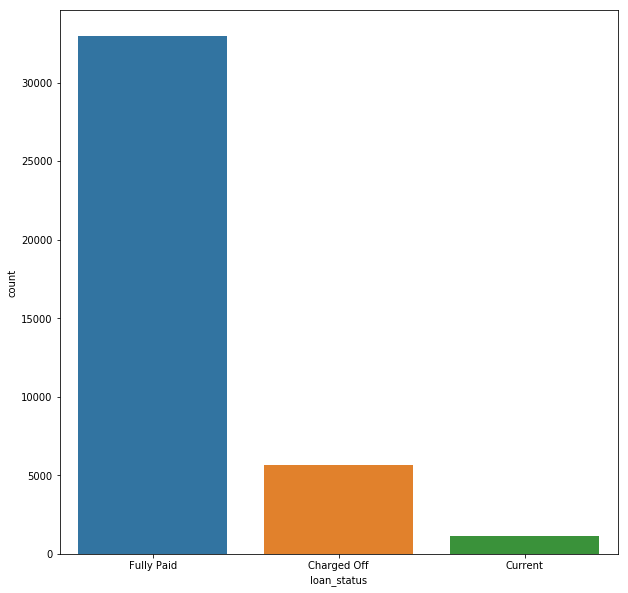

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", data=loans_df)
plt.show()

#### Lets create three data frames paid, current and default
#### We will look for patterns in the default and later compare those traits with paid and current

In [19]:
paid = loans_df[loans_df.loan_status == 'Fully Paid']

In [20]:
paid.shape

(32950, 34)

In [21]:
current = loans_df[loans_df.loan_status == 'Current']

In [22]:
current.shape

(1140, 34)

In [23]:
default = loans_df[loans_df.loan_status == 'Charged Off']

In [24]:
default.shape

(5627, 34)

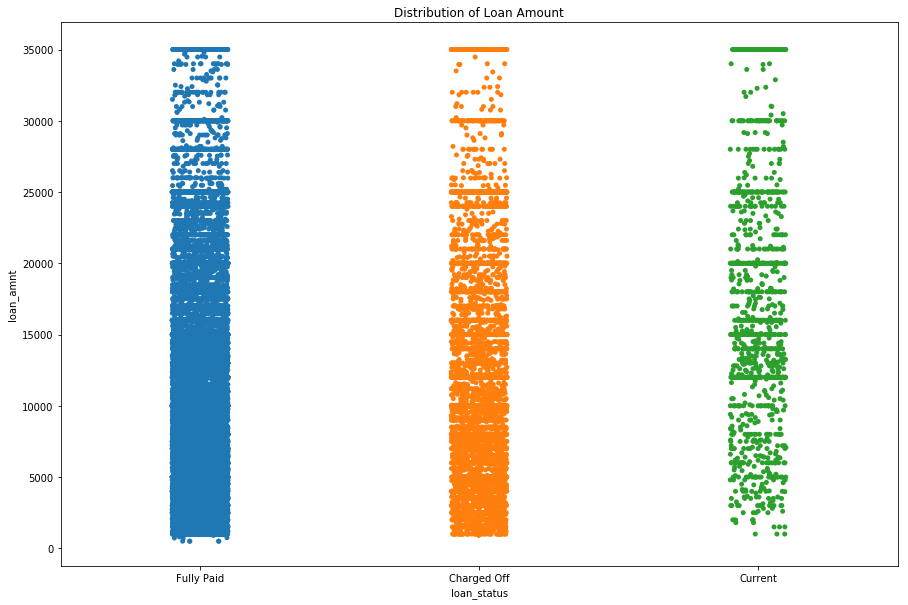

In [25]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Loan Amount")
sns.stripplot(x="loan_status", y="loan_amnt", data=loans_df, jitter=True);
plt.show()

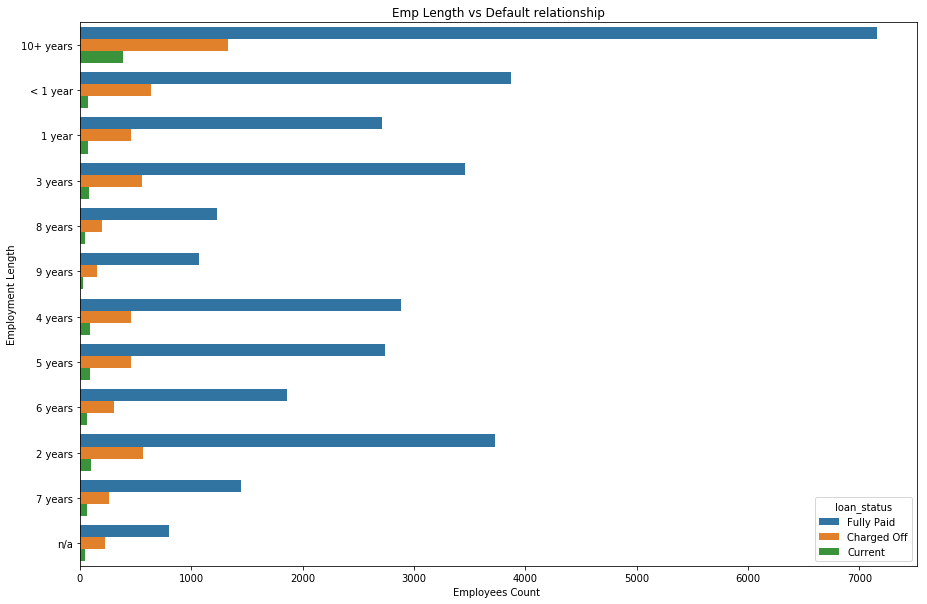

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',hue='loan_status',data=loans_df)
plt.xlabel("Employees Count ")
plt.ylabel("Employment Length")
plt.title("Emp Length vs Default relationship")
plt.show()

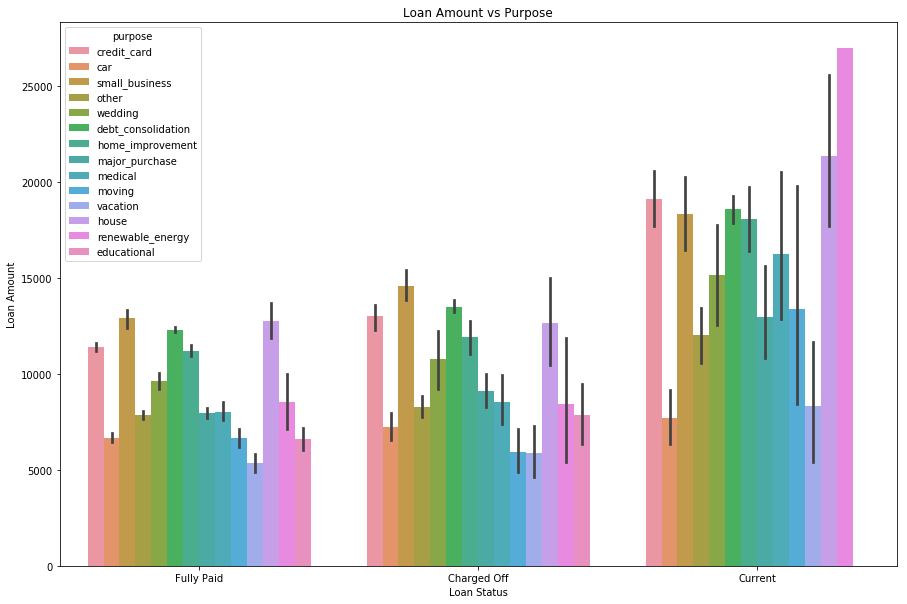

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loans_df)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

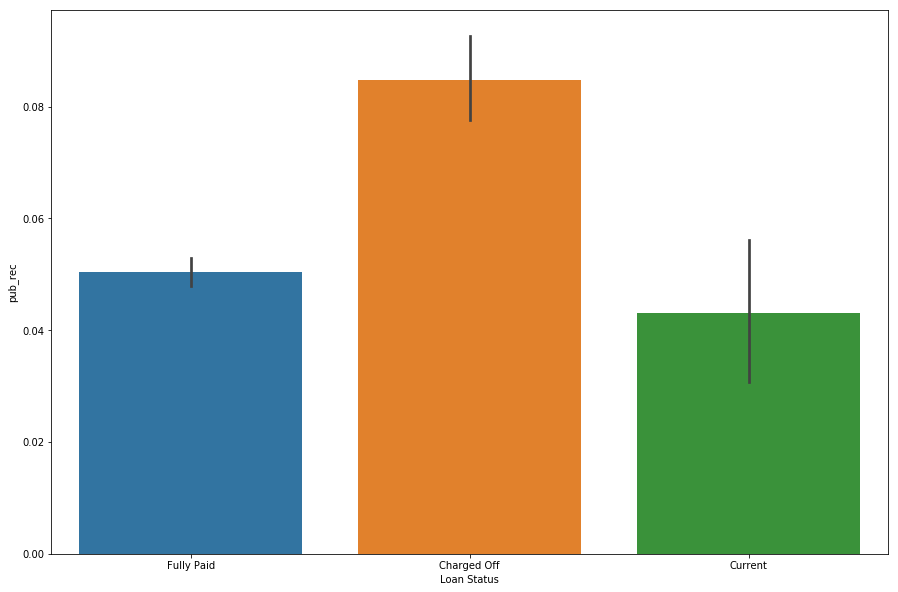

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='pub_rec',data=loans_df)
plt.xlabel("Loan Status")
plt.show()

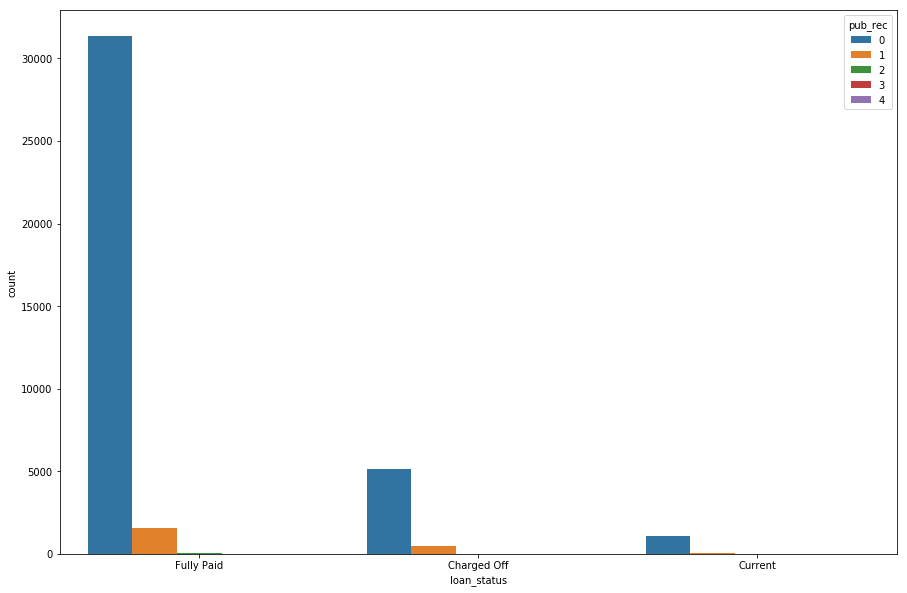

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status", hue='pub_rec', data=loans_df)
plt.show()

In [30]:
loans_df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

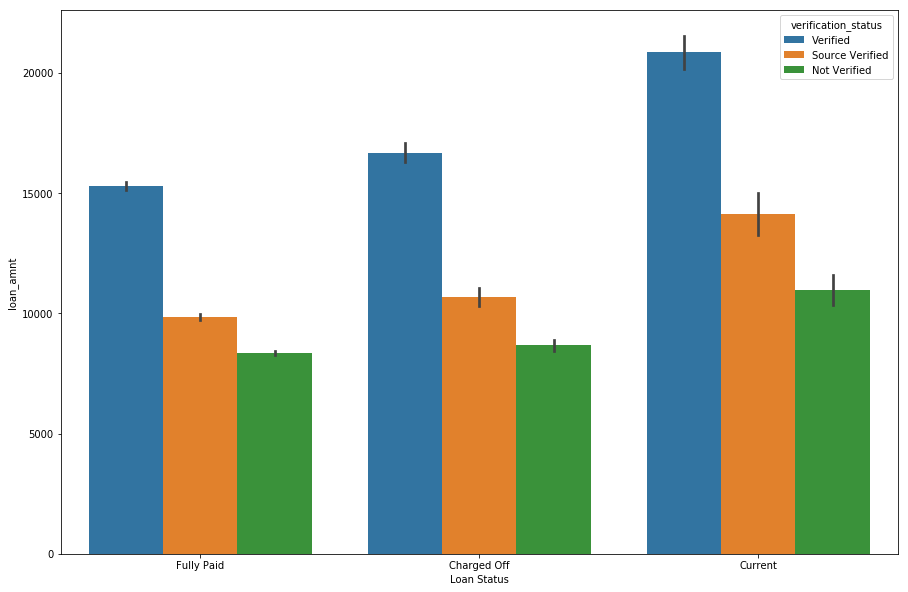

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loans_df)
plt.xlabel("Loan Status")
plt.show()

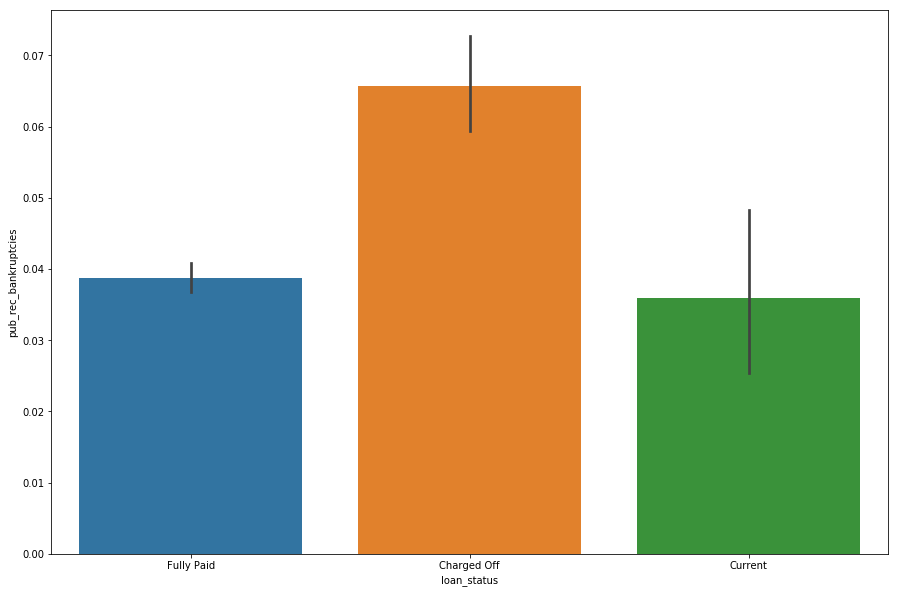

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='pub_rec_bankruptcies', data=loans_df)
plt.show()

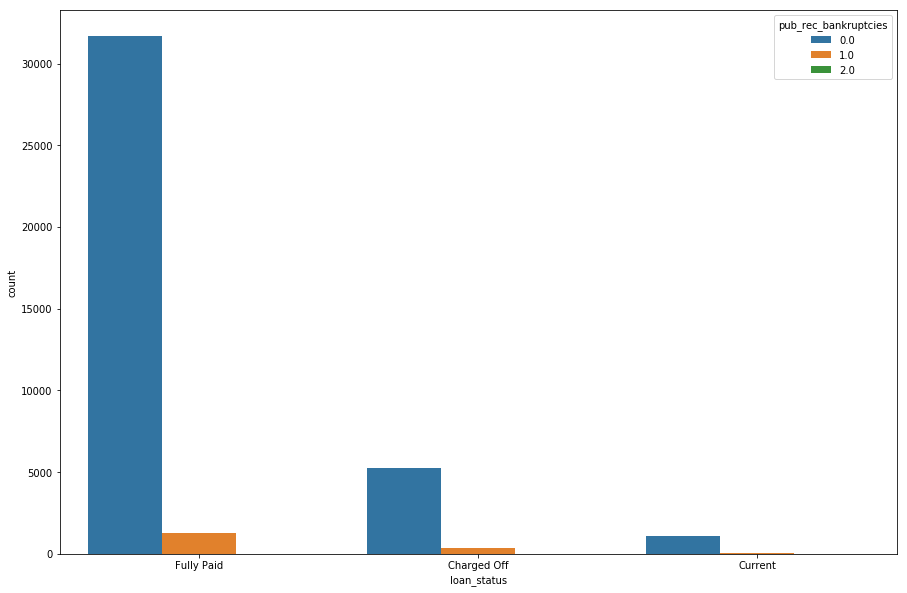

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status", hue='pub_rec_bankruptcies', data=loans_df)
plt.show()

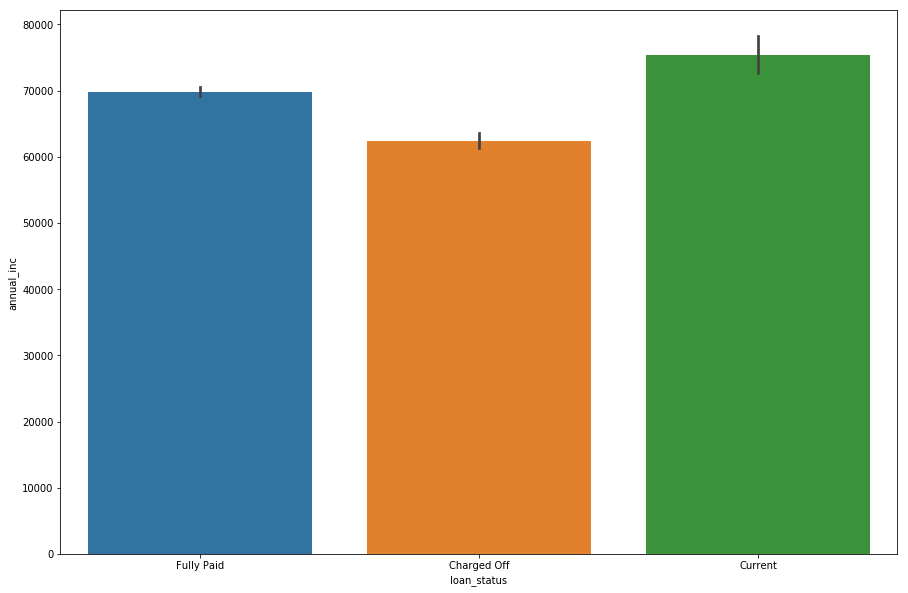

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='annual_inc', data=loans_df)
plt.show()

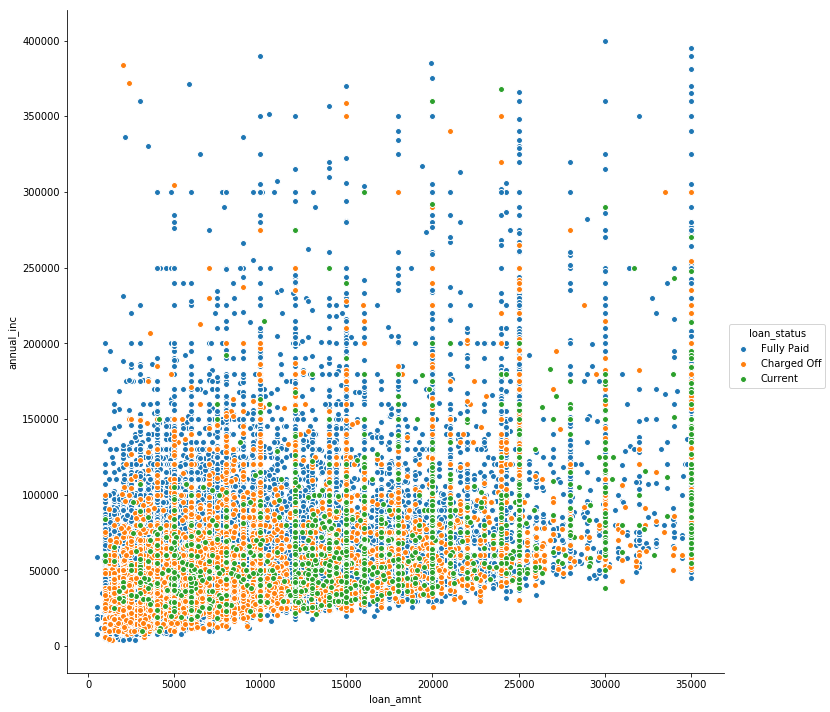

In [41]:
temp_df = loans_df[loans_df['annual_inc'] < 400000] 
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=temp_df, hue="loan_status", size=10)
plt.show()

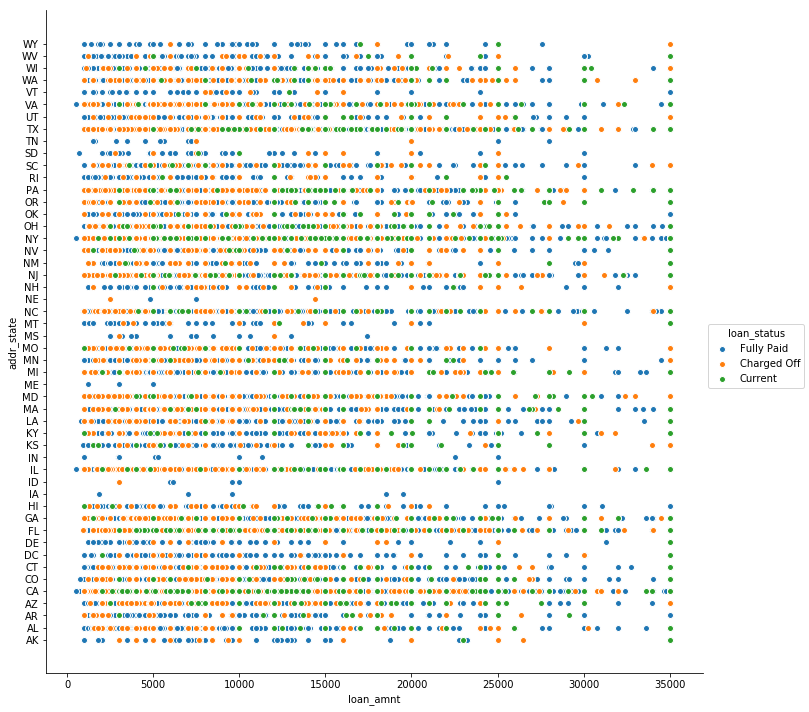

In [36]:
sns.pairplot(x_vars=["loan_amnt"], y_vars=["addr_state"], data=loans_df, hue="loan_status", size=10)
plt.show()

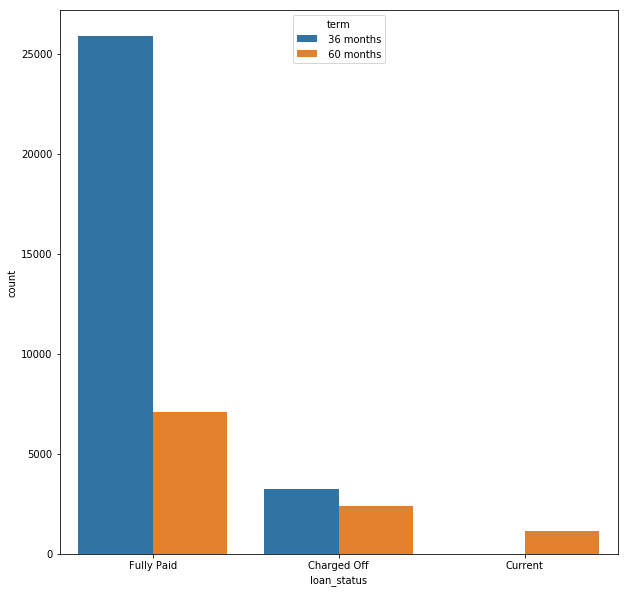

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", hue='term', data=loans_df)
plt.show()

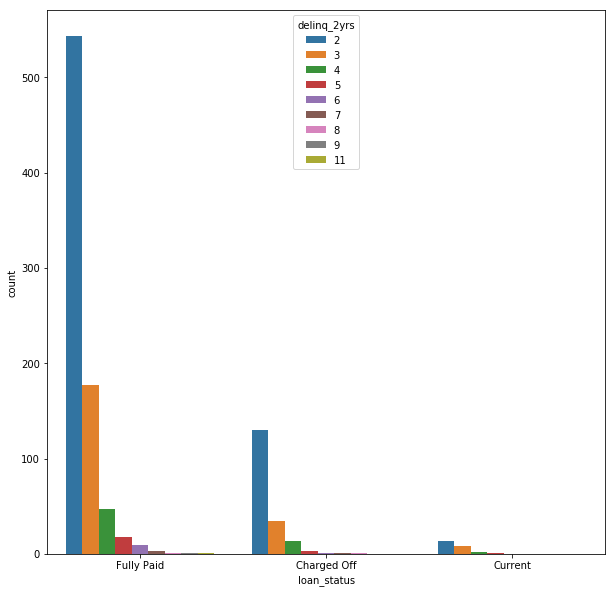

In [48]:
plt.figure(figsize=(10,10))
temp_df = loans_df[loans_df['delinq_2yrs'] > 1]
sns.countplot(x="loan_status", hue='delinq_2yrs', data=temp_df)
plt.show()